In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-20 13:24:40.394882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("./data/porsche_instagram.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [3]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,profileUrl,username,viewCount,playCount,filteredContentEn,filteredContentDe
0,https://www.instagram.com/p/Cm6QO3Uoz-A/,Das neue Jahr hat begonnen und wir können es s...,2,298,2023-01-02 10:56:14+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,The new year has begun and we can hardly wait ...,Das neue Jahr hat begonnen und wir können es s...
1,https://www.instagram.com/p/Cm6QO3Uoz-A/,Das neue Jahr hat begonnen und wir können es s...,2,298,2023-01-02 10:56:14+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,The new year has begun and we can hardly wait ...,Das neue Jahr hat begonnen und wir können es s...
2,https://www.instagram.com/p/CnAKVbkNMQG/,"Eines der großen Highlights, die 2023 auf Euch...",1,210,2023-01-04 18:00:09+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,One of the big highlights that awaits you in 2...,"Eines der großen Highlights, die 2023 auf Euch..."
3,https://www.instagram.com/p/CnAKVbkNMQG/,"Eines der großen Highlights, die 2023 auf Euch...",1,210,2023-01-04 18:00:09+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,One of the big highlights that awaits you in 2...,"Eines der großen Highlights, die 2023 auf Euch..."
4,https://www.instagram.com/p/CnAKVbkNMQG/,"Eines der großen Highlights, die 2023 auf Euch...",1,210,2023-01-04 18:00:09+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,One of the big highlights that awaits you in 2...,"Eines der großen Highlights, die 2023 auf Euch..."


In [23]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model, n_gram_range=(1, 3))
topics, probs = model.fit_transform(df.filteredContentEn.values)

In [24]:
model.get_topic_info().Name.values

array(['-1_the asparagus season_asparagus season_famous schwetzingen asparagus_schwetzingen asparagus',
       '0_porsche 911_porsche_taycan_driving experiences',
       '1_964 anniversary models_porsche models_numerous porsche_anniversary models',
       '2_new gt3 rs_the new gt3_new gt3_porsche',
       '3_of porsche sports_porsche sports cars_festival of dreams_porsche sports',
       '4_frhschicht events_porsche drivers and_first frhschichtpechhr_frhschicht visitor record',
       '5_next early shift_early shift at_early shift_carscoffee event was',
       '6_new 911 dakar_911 dakar in_911 dakar with_911 dakar',
       '7_international drone day_drone day_international drone_drone',
       '8_porsche track snow_duo porsche track_porsche track_track snow started',
       '9_architecture_architectural_design_new 911 gt3',
       '10_of 911 anniversary_years of 911_the 60 years_60 years of',
       '11_porsche experience center_porsche experience_party the porsche_porsche design',
   

In [25]:
model.get_topic_freq()

,Topic,Count
1,0,91
8,1,65
7,2,36
5,3,32
13,4,28
0,-1,21
2,5,20
14,6,17
11,7,16
4,8,15


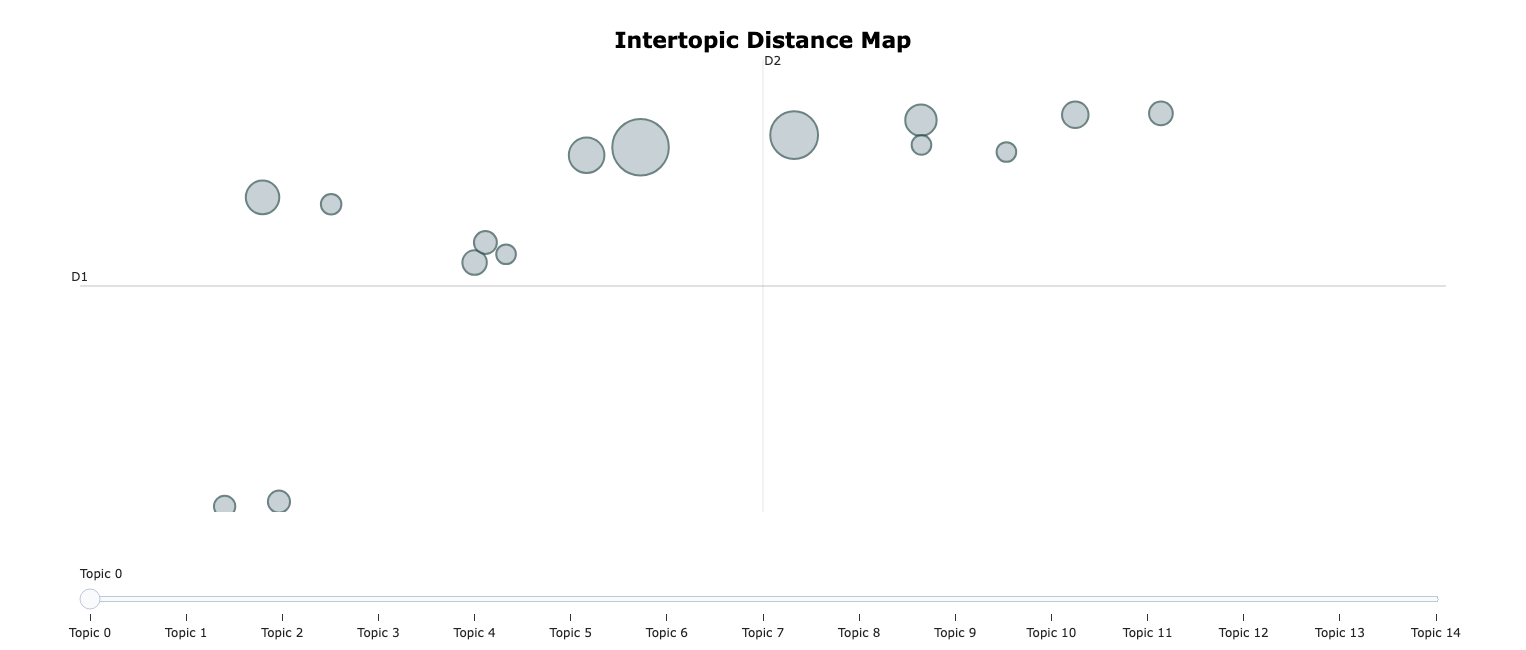

In [26]:
model.visualize_topics()

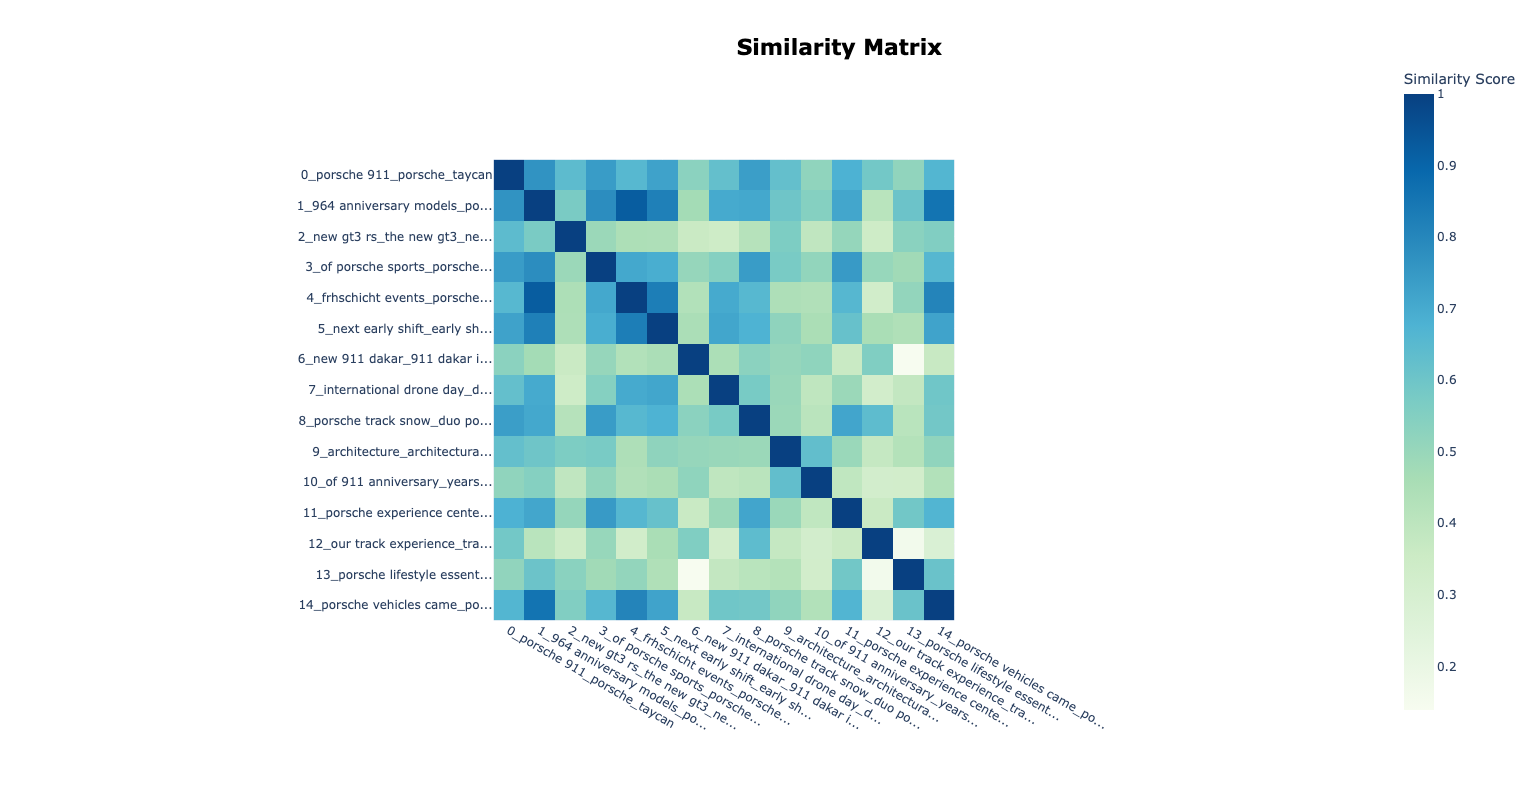

In [27]:
model.visualize_heatmap()